<a href="https://colab.research.google.com/github/ZT-715/QuarentenaDadosChallenges/blob/master/QuarentenaDadosDay5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5

Nessa aula discutiremos o que é o processo de classificação e como as máquinas podem aprender esse processo. Após essa discussão iniciaremos o tratamento dos dados para criar nosso primeiro modelo de ML.

A primeira coisa que devemos fazer é separar os dados que vamos usar como entrada do nosso modelo, dos que precisamos prever:

In [102]:
x_4_notasSemZero = acertos[['NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']]
x_4_notas = dados[['NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']]
x_4_notas

,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO
6,436.80,505.20,428.50,560.00
10,767.50,651.50,630.20,800.00
11,584.10,622.30,591.40,680.00
18,616.40,435.10,490.80,460.00
24,526.10,631.00,416.00,600.00
...,...,...,...,...
137797,601.80,658.30,626.60,760.00
137804,467.10,560.50,460.80,480.00
137819,536.40,432.60,392.00,280.00
137827,725.60,630.20,546.00,700.00


Vamos usar as notas das provas de ciências naturais, ciências humanas, matemática e redação para prever as notas da prova de linguagem e códigos. 

Como separamos os dados de entrada, também devemos fazer o mesmo com aqueles que precisamos adivinhar.

In [103]:
y_adivinharSemZero = acertos['NU_NOTA_LC']
y_adivinhar = dados['NU_NOTA_LC']
y_adivinhar

6        521.00
10       625.90
11       614.90
18       531.70
24       612.30
          ...  
137797   622.70
137804   519.50
137819   402.80
137827   625.00
137836   528.50
Name: NU_NOTA_LC, Length: 26568, dtype: float64

Agora temos os dados que precisamos classificar, mas repare que essa é toda nossa informação! Se eu treinar um modelo com todos esses dados, como eu vou conseguir medir a qualidade do modelo? 

Por isso precisamos dividir nossos dados em dois grupos, um para treino e outro para teste.

Para fazer isso vamos usar métodos da biblioteca Scikit-learn, ela é uma das principais ferramentas no mundo do Machine Learning! Vale conferir e estudar um pouco mais sobre ela, aqui está o [link para a documentação](https://scikit-learn.org/stable/).

Além do Sklearn, iremos utilizar o numpy para setar o seed dos números pseudo-aleatórios.

In [104]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

# f(x) = y
x_treinoZeros, x_testeZeros, y_treinoZeros, y_testeZeros = train_test_split(x_4_notas, y_adivinhar)
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notasSemZero, y_adivinharSemZero)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(16335, 4)
(5446, 4)
(16335,)
(5446,)


In [105]:
x_treino.head()

,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO
104016,645.60,613.20,521.50,760.00
128584,501.20,595.90,474.30,600.00
59414,737.80,717.90,591.50,840.00
14424,419.80,472.80,438.50,340.00
68624,476.70,466.70,544.10,380.00


Feita a divisão dos nossos dados, chegou a hora de criar seu primeiro modelo de Regressão(Em aula discutimos a diferença entre regressão e classificação).

Vamos utilizar o LinearSVR do scikit-learn:

In [106]:
from sklearn.svm import LinearSVR

modeloLSVR = LinearSVR()
modeloLSVR.fit(x_treino, y_treino)

modeloZerosLSVR = LinearSVR()
modeloZerosLSVR.fit(x_treinoZeros, y_treinoZeros)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Até o momento nós treinamos o modelo apenas com o `.fit()`, mas falta fazer a predição dos resultados. Para realizar a predição chamamos o método `.predict()` do **modelo**.

In [107]:
predicoes_notas_linguagemLSVR = modeloLSVR.predict(x_teste)
predicoes_notas_linguagemLSVR[:5]

array([596.33693554, 774.60658677, 761.756048  , 544.26831747,
       750.35511231])

In [108]:
predicoes_notas_linguagem_zerosLSVR = modeloZerosLSVR.predict(x_testeZeros)
predicoes_notas_linguagem_zerosLSVR[:5]

array([609.17780159, 505.92179973, 487.03810118, 528.17954227,
       380.86364025])

Compare a saída da predição com os valores reais logo abaixo, parece que está fazendo sentido, certo?!

In [109]:
y_teste[:5]

72940    445.80
89096    636.80
25637    639.80
120075   421.10
115217   662.90
Name: NU_NOTA_LC, dtype: float64

In [110]:
y_testeZeros[:5]

67745    590.10
135333   552.50
51853    595.40
54957    534.60
124947   408.10
Name: NU_NOTA_LC, dtype: float64

Nos próximos trechos de códigos vamos plotar alguns gráficos! As discussões e todas as análises sobre estas visualizações foram feitas de forma muito rica na videoaula, portanto recomendo fortemente acompanhá-las.

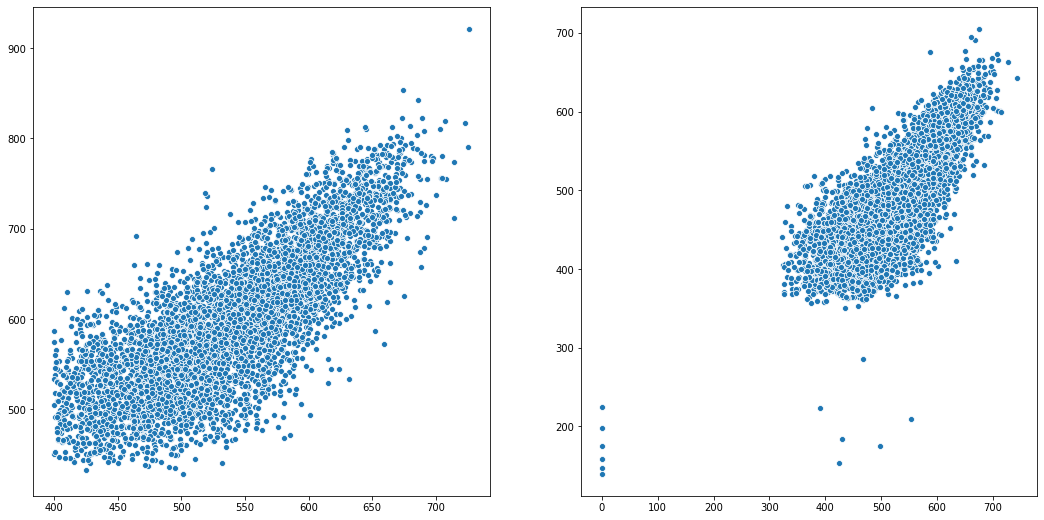

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

In [129]:
f, ax = plt.subplots(1, 2,figsize=(18,9))

a = plt.figure(figsize=(9,9))
a = sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagemLSVR, ax=ax[0])

b = plt.figure(figsize=(9,9))
b = sns.scatterplot(x=y_testeZeros.values, y=predicoes_notas_linguagem_zerosLSVR, ax=ax[1])
plt.show()

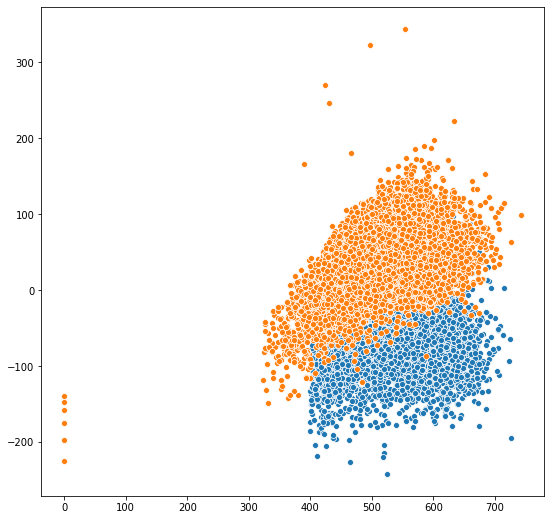

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagemLSVR)
sns.scatterplot(x=y_testeZeros.values, y=y_testeZeros.values - predicoes_notas_linguagem_zerosLSVR)

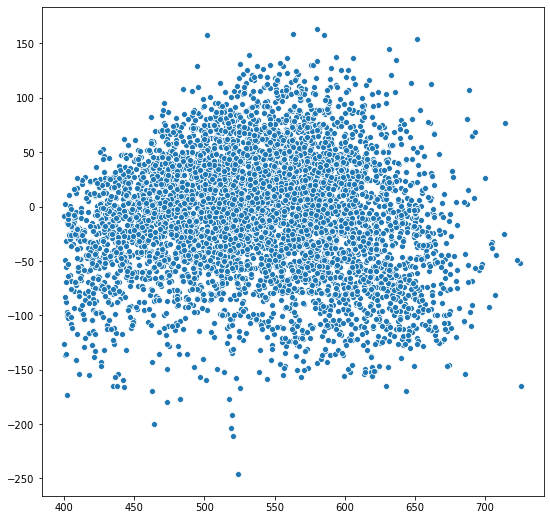

In [113]:
# minha predição TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))


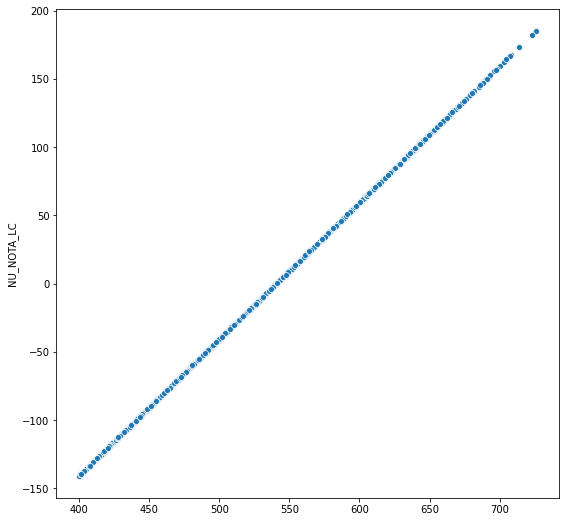

In [114]:
# predição do paulo TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())


Após discutir esses gráficos, vamos criar mais um modelo de **machine learning** basededo em "árvores":

In [0]:
from sklearn.tree import DecisionTreeRegressor

modeloTree = DecisionTreeRegressor()
modeloTree.fit(x_treino, y_treino)
predicoes_notas_linguagemTree = modelo.predict(x_teste)

modeloZerosTree = DecisionTreeRegressor()
modeloZerosTree.fit(x_treinoZeros, y_treinoZeros)
predicoes_notas_linguagem_zerosTree = modeloZerosTree.predict(x_testeZeros)

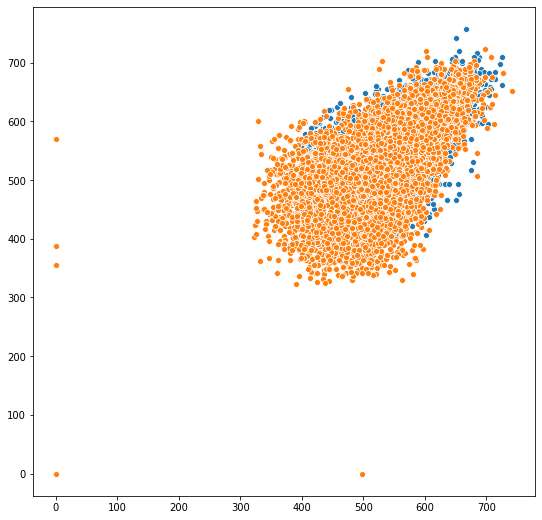

In [116]:
plt.figure(figsize=(9,9))

sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagemTree)
sns.scatterplot(x=y_testeZeros.values, y=predicoes_notas_linguagem_zerosTree)

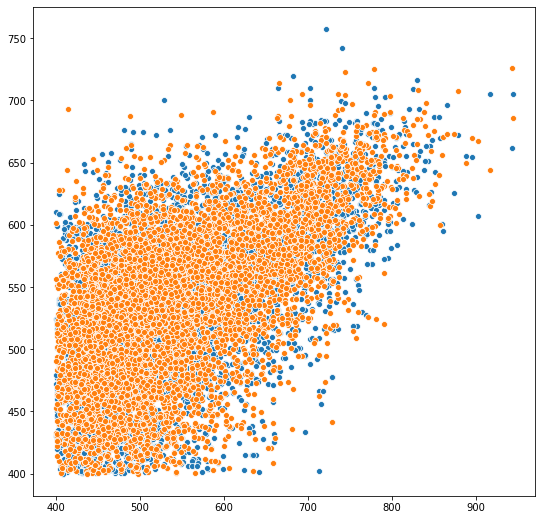

In [117]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['NU_NOTA_MT'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['NU_NOTA_MT'].values, y=y_teste.values)

Após treinar o modelo e fazer as predições, plotamos duas imagens. A primeira é muito parecida com as os gráficos do primeiro classificador, mas a segunda mostra os valores reais e valores previstos!

Essa figura é muito interessante e mostra uma sobreposição muito boa entre elas, indicando que nossos resultados fazem sentido.

Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem, por isso ficaria complexo avaliar dois ou três modelos apenas com gráficos.

O que precisamos agora é de uma métrica capaz de nos dizer como nosso modelo está indo, aqui vamos usar o [erro quadrático médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio). Existem centenas de métricas de avaliação, tudo vai depender do que você precisa e o que você está prevendo. 

In [186]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Linear SVR sem Zeros: ", mean_squared_error(y_teste, predicoes_notas_linguagemLSVR))
print("Linear SVR com Zeros: ", mean_squared_error(y_testeZeros, predicoes_notas_linguagem_zerosLSVR), end="\n\n")
print("Decision Tree sem Zeros: ", mean_squared_error(y_teste, predicoes_notas_linguagemTree))
print("Decision Tree com Zeros: ", mean_squared_error(y_testeZeros, predicoes_notas_linguagem_zerosTree))

Linear SVR sem Zeros:  5812.464100680255
Linear SVR com Zeros:  3371.3958969814016

Decision Tree sem Zeros:  2996.2572732280573
Decision Tree com Zeros:  4127.720576633544


Veja que nosso erro quadrático médio deu em torno dos 4186.22. Embora pelo gráfico nosso modelo pareça muito bom, pela métrica parece ser um pouco alto.

O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor. Veja o resultado quando calculamos o MSE de dois vetores iguais:

In [119]:
mean_squared_error(y_teste, y_teste)

0.00

Nosso resultado é zero! 
Você deve estar se perguntando: meu modelo não está nem perto de zero, será que ele é tão ruim assim?

Nós ainda não temos como te dar essa resposta, precisamos de um critério comparativo, pois assim conseguimos dizer como nosso modelo está indo. Por exemplo, que tal classificar os nossos dados de uma maneira "bobinha"? Para isso temos os chamados métodos **Dummy**.

In [120]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

4139.14

Finalmente conseguimos responder se nosso modelo é tão ruim assim! Na realidade nosso modelo não é um dos melhores, temos muito o que melhorar, mas já somos melhores que uma classificação ingênua. 

Com isso, encerramos nossa última aula. Espero que vocês tenham gostado! 

Participem também do nosso **desafio final, valendo um Nintendo Switch**.

Bons estudos e boa sorte!

Forte abraço!

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

In [282]:
LSVRNewParams4 = LinearSVR(C=.591, max_iter=5550000)#r20.6196 5,55 mi .591
LSVRNewParams4.fit(x_treinoZeros, y_treinoZeros)


LinearSVR(C=0.591, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=5550000,
          random_state=None, tol=0.0001, verbose=0)

In [284]:
print("MSE: ", mean_squared_error(y_testeZeros, LSVRNewParams4.predict(x_testeZeros)))
print("r2: ", r2_score(y_testeZeros, LSVRNewParams4.predict(x_testeZeros)).round(4))


MSE:  2056.0669535679917
r2:  0.6192


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

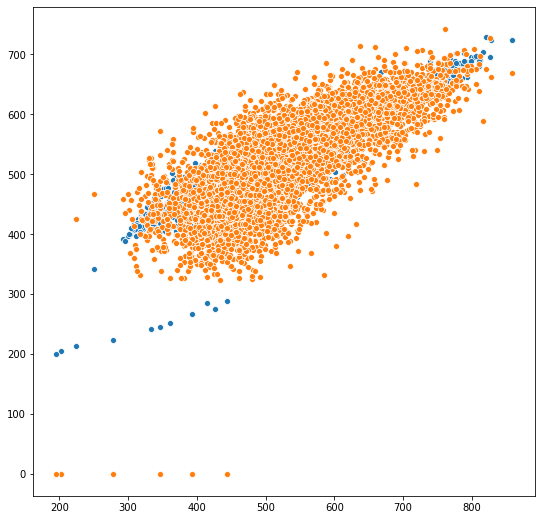

In [280]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste.mean(axis=1).values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=y_teste.values)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

Linear SVR sem Zeros:  5812.464100680255

Linear SVR com Zeros:  3371.3958969814016

Decision Tree sem Zeros:  2996.2572732280573

Decision Tree com Zeros:  4127.720576633544

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [134]:
LSVRpredictTreino = modeloLSVR.predict(x_treino)
ZerosLSVRpredictTreino = modeloZerosLSVR.predict(x_treinoZeros)


print("predict com treino values no LSVR: ", mean_squared_error(y_treino, LSVRpredictTreino))
print("predict com treino values no zerosLSVR: ", mean_squared_error(y_treinoZeros, ZerosLSVRpredictTreino))

predict com treino values no LSVR:  5831.012787697753
predict com treino values no zerosLSVR:  3349.153162766941


In [135]:
TreePredictTreino = modeloTree.predict(x_treino)
ZerosTreePredictTreino = modeloZerosTree.predict(x_treinoZeros)


print("predict com treino values no decision Tree: ", mean_squared_error(y_treino, TreePredictTreino))
print("predict com treino values com zeros no decision Tree: ", mean_squared_error(y_treinoZeros, ZerosTreePredictTreino))


predict com treino values no decision Tree:  0.0
predict com treino values com zeros no decision Tree:  0.0


## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

Através de frameworks de ML consegumos chegar e uma aproximaçao da nota de LC utiliando as outras, no entanto graças a minha própria baixa compreenção e experencia utilizando os mesmos nao foi possivel chegar com tanta precizao ao objetivo. No entanto a experencia de fazer isso é devaras divertido!